### 골목상권 중 프렌차이즈 점포 수가 가장 많은 구역은?

In [56]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 

In [57]:
# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [58]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 데이터 불러오기

In [60]:
df = pd.read_csv("/Users/crlee/pandas/서울시_골목상권_재범주.csv",encoding='cp949',low_memory=False)

In [62]:
df

,상권_코드_명,상권별_매출액_평균,프랜차이즈_점포_수,식료품_지출_총금액,의류_신발_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,평일_생활인구_수,주말_생활인구_수,시군구_명,연령대_1020_생활인구_수,연령대_3040_생활인구_수,연령대_5060_생활인구_수,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
0,4.19민주묘지역 2번,1.787499e+08,15,153409088.0,66086125.0,16527418.0,67936118.0,23209006.0,17727,7189,강북구,8442,6268,10205,8131,7759,9025
1,KT&G 북부지사,1.489174e+08,4,103482570.0,33922469.0,10648492.0,26185510.0,11850089.0,6430,3320,강북구,2416,2503,4831,3467,3724,2559
2,가오리역 1번,1.736823e+08,13,134732302.0,61000987.0,14867222.0,69391243.0,21009363.0,41924,17133,강북구,15103,15957,27997,18027,19683,21346
3,가오리역 2번,1.330093e+08,6,345845765.0,154382931.0,38820923.0,176899921.0,53897514.0,22254,9111,강북구,8804,8363,14197,9648,8522,13194
4,강북구청,1.955185e+08,9,236654594.0,90436416.0,24992761.0,79324159.0,31756979.0,57793,24087,강북구,24138,23857,33885,25973,26332,29576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,청계산원터골,7.587535e+08,2,24543421.0,10622543.0,2670498.0,10464033.0,3768680.0,0,0,서초구,0,0,0,0,0,0
1083,청계산입구역 2번(내곡동주민센터),5.359684e+08,0,87820910.0,43203576.0,10075125.0,37200033.0,15964810.0,378,149,서초구,138,175,213,233,220,73
1084,한국상담대학원대학교,6.713270e+08,1,46411277.0,25402871.0,5788545.0,35195730.0,9108090.0,4676,1706,서초구,1993,2368,2019,2135,1469,2776
1085,한전아트센터,6.967944e+07,2,86420436.0,47052803.0,10639633.0,62897294.0,15937072.0,28553,9762,서초구,11971,14824,11519,13655,11549,13110


### 필요한 열만 추출

In [63]:
select_col = [ '프랜차이즈_점포_수','시군구_명','상권_코드_명']
df2 = df[select_col]
df2

,프랜차이즈_점포_수,시군구_명,상권_코드_명
0,15,강북구,4.19민주묘지역 2번
1,4,강북구,KT&G 북부지사
2,13,강북구,가오리역 1번
3,6,강북구,가오리역 2번
4,9,강북구,강북구청
...,...,...,...
1082,2,서초구,청계산원터골
1083,0,서초구,청계산입구역 2번(내곡동주민센터)
1084,1,서초구,한국상담대학원대학교
1085,2,서초구,한전아트센터


### 프랜차이즈 점포 수 0인 값 제외

In [64]:
# df2 = df2[df2['프랜차이즈_점포_수'] != 0]

### 시군구_명 을 기준으로 합계

In [66]:
df2 = df2.groupby('시군구_명')['프랜차이즈_점포_수'].sum().reset_index()
df2

,시군구_명,프랜차이즈_점포_수
0,강남구,390
1,강동구,597
2,강북구,336
3,강서구,763
4,관악구,696
5,광진구,488
6,구로구,532
7,금천구,395
8,노원구,488
9,도봉구,447


In [67]:
### 내림차순

In [68]:
df4 = df2.sort_values('프랜차이즈_점포_수', ascending=False)
df4

,시군구_명,프랜차이즈_점포_수
3,강서구,763
4,관악구,696
17,송파구,665
16,성북구,602
1,강동구,597
24,중랑구,592
21,은평구,554
12,마포구,540
6,구로구,532
10,동대문구,518


### 트리맵으로 시각화

In [69]:
# !pip install squarify

In [70]:
# 트리맵 시각화
import squarify

<Axes: >

(0.0, 100.0, 0.0, 100.0)

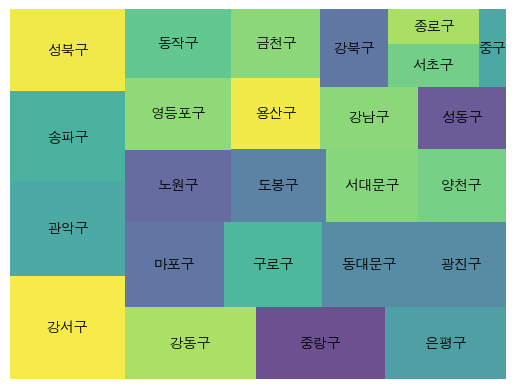

In [71]:
# 트리맵으로 시각화
sizes = df4['프랜차이즈_점포_수'].values
squarify.plot(sizes = sizes,label= df4['시군구_명'],alpha=0.8)
plt.axis('off')
plt.title('프렌차이즈 점포 수 상위 5개 구')
plt.show()

# colors =[....]
# color = colors 설정해도 됨

### 상위 하위 5개씩 추출

In [78]:

# 상위 5개 행 추출
top_5 = df4.head(5)

# 하위 5개 행 추출
bottom_5 = df4.tail(5)

# 상위 5개와 하위 5개 행을 결합하여 새로운 데이터프레임 생성
new_df = pd.concat([top_5, bottom_5])
new_df
bottom_5
top_5

,시군구_명,프랜차이즈_점포_수
3,강서구,763
4,관악구,696
17,송파구,665
16,성북구,602
1,강동구,597
15,성동구,350
2,강북구,336
14,서초구,245
22,종로구,201
23,중구,135


,시군구_명,프랜차이즈_점포_수
15,성동구,350
2,강북구,336
14,서초구,245
22,종로구,201
23,중구,135


,시군구_명,프랜차이즈_점포_수
3,강서구,763
4,관악구,696
17,송파구,665
16,성북구,602
1,강동구,597


<Axes: >

(0.0, 100.0, 0.0, 100.0)

Text(0.5, 1.0, '시군구별 프렌차이즈 점포 수 상하위5개')

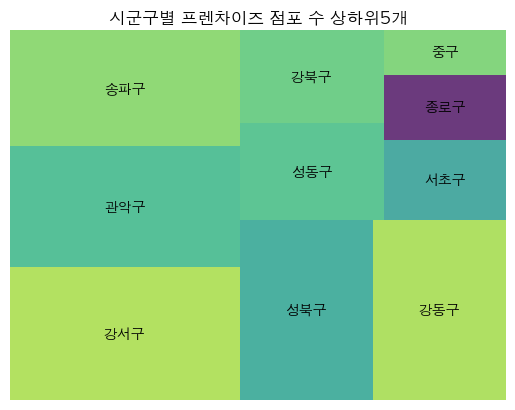

In [83]:
# 트리맵으로 시각화
sizes = new_df['프랜차이즈_점포_수'].values
squarify.plot(sizes = sizes,label= new_df['시군구_명'],alpha=0.8)
plt.axis('off')
plt.title('시군구별 프렌차이즈 점포 수 상하위5개')
plt.show()


# colors =[....]
# color = colors 설정해도 됨

In [74]:
# 상위 5개 시각화

<Axes: >

(0.0, 100.0, 0.0, 100.0)

Text(0.5, 1.0, '프렌차이즈 점포 수 상위 5개 시군구')

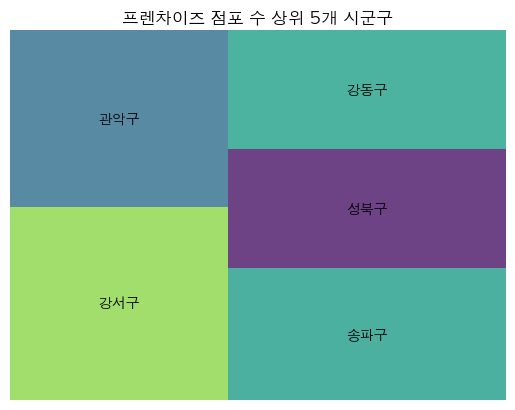

In [81]:
sizes = top_5['프랜차이즈_점포_수'].values
squarify.plot(sizes = sizes,label= top_5['시군구_명'],alpha=0.8)
plt.axis('off')
plt.title('프렌차이즈 점포 수 상위 5개 시군구')

plt.show()

In [76]:
# 하위 5개 시각화

<Axes: >

Text(0.5, 1.0, '프렌차이즈 점포 수 하위 5개 구')

(0.0, 100.0, 0.0, 100.0)

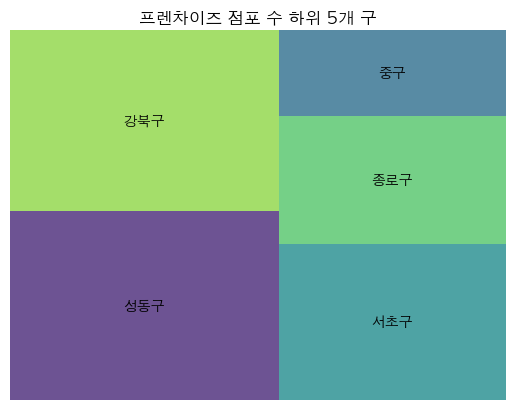

In [82]:
sizes = bottom_5['프랜차이즈_점포_수'].values
squarify.plot(sizes = sizes,label= bottom_5['시군구_명'],alpha=0.8)
plt.title('프렌차이즈 점포 수 하위 5개 구')

plt.axis('off')
plt.show()